<h1><title> Sprint Project 8: Data Analysis for Zuber Company </title> <h1>

<h3>Project Objective: </h3>

1. Identify the 10 most popular travel destinations.
2. Analyse the number of trips per transportation company.
3. Estimate the correlation between trip duration from Loop to O'Hare using a hypothesis test.

<h3> Analysis Process Description: </h3>

The dataset consists of three tables: moved_project_sql_result_01, moved_project_sql_result_04, and moved_project_sql_result_07. The tables will be initially imported and inspected. Missing values, duplicates, and data types will then be cleaned and corrected. Once the data is prepared through descriptive statistics and inferential statistics, the analysis objectives will be addressed, and conclusions will be drawn.


<h3> Library and Data Import </h3>


Library import:

In [1]:
from scipy import stats as st
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Data import:

In [2]:
table_1=pd.read_csv('moved_project_sql_result_01.csv')
table_2=pd.read_csv('moved_project_sql_result_04.csv')
table_3=pd.read_csv('moved_project_sql_result_07.csv')

Data exploration:

In [3]:
table_1.info()
print()
table_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB



company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

It is observed that Table 1 has two columns named company_name and trips_amount, both of which contain no missing values. The data types in the table are appropriate for the content.

In [4]:
table_2.info()
print()
table_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB



dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

It is observed that Table 2 has two columns named dropoff_location_name and average_trips, both of which contain no missing values. The data types are suitable for the values contained in the columns.

In [5]:
table_3.info()
print()
table_3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB



start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

It is observed that Table 3 has three columns named start_ts, weather_conditions, and duration_seconds. The start_ts column contains date values; however, the data type is incorrect and should be converted accordingly.

<h3>Inspection of duplicated values and data type correction</h3>

In [6]:
print(table_1.duplicated().sum())
print()
print(table_2.duplicated().sum())
print()
print(table_3.duplicated().sum())

0

0

197


In [7]:
duplicated_3=table_3.duplicated()
table_3['duplicated']=duplicated_3
duplicated_rows= table_3[table_3['duplicated']==True]
print(duplicated_rows.head(10))

                start_ts weather_conditions  duration_seconds  duplicated
62   2017-11-11 06:00:00               Good            1260.0        True
74   2017-11-11 08:00:00               Good            1380.0        True
76   2017-11-04 09:00:00               Good            1380.0        True
117  2017-11-11 07:00:00               Good            1380.0        True
119  2017-11-04 14:00:00               Good            3300.0        True
125  2017-11-11 08:00:00               Good            1380.0        True
126  2017-11-11 09:00:00               Good            1380.0        True
130  2017-11-11 10:00:00               Good            1260.0        True
179  2017-11-11 06:00:00               Good            1260.0        True
190  2017-11-04 08:00:00               Good            1323.0        True


It is observed that Table 1 and Table 2 do not contain any duplicate rows. In the case of Table 3, some rows appear to be duplicates, but this may be due to the incorrect data type. The data type of the start_ts column will be corrected, and a new check for duplicate rows will be performed.

In [8]:
table_3['start_ts']=pd.to_datetime(table_3['start_ts'], format='%Y-%m-%d %H:%M:%S')
table_3=table_3.drop('duplicated', axis=1)
table_3.info()
print()
table_3.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB



start_ts weather_conditions  duration_seconds
0 2017-11-25 16:00:00               Good            2410.0
1 2017-11-25 14:00:00               Good            1920.0
2 2017-11-25 12:00:00               Good            1543.0
3 2017-11-04 10:00:00               Good            2512.0
4 2017-11-11 07:00:00               Good            1440.0
5 2017-11-11 04:00:00               Good            1320.0
6 2017-11-04 16:00:00                Bad            2969.0
7 2017-11-18 11:00:00               Good            2280.0
8 2017-11-11 14:00:00               Good            2460.0
9 2017-11-11 12:00:00               Good            2040.0

In [9]:
duplicated_3=table_3.duplicated()
table_3['duplicated']=duplicated_3
duplicated_rows= table_3[table_3['duplicated']==True]
print(duplicated_rows.head(10))
print()
print(table_3.duplicated().sum())

               start_ts weather_conditions  duration_seconds  duplicated
62  2017-11-11 06:00:00               Good            1260.0        True
74  2017-11-11 08:00:00               Good            1380.0        True
76  2017-11-04 09:00:00               Good            1380.0        True
117 2017-11-11 07:00:00               Good            1380.0        True
119 2017-11-04 14:00:00               Good            3300.0        True
125 2017-11-11 08:00:00               Good            1380.0        True
126 2017-11-11 09:00:00               Good            1380.0        True
130 2017-11-11 10:00:00               Good            1260.0        True
179 2017-11-11 06:00:00               Good            1260.0        True
190 2017-11-04 08:00:00               Good            1323.0        True

82


After applying the data type conversion, the number of duplicate entries decreased from 197 to 82. It is possible that more than one trip was recorded for the same timestamp. These will be marked as duplicate trips, and further analysis will determine whether including or excluding these records impacts the results.

<h3>Analysis of the Top 10 Destination Locations</h3>

Table 2 contains information on the average number of trips associated with each destination. The table will be sorted by average number of trips in descending order, and the top 10 rows will be selected to identify the most popular destinations.

In [10]:
top_10_destinations=table_2.sort_values(by='average_trips', ascending=False).head(10)
print(top_10_destinations)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


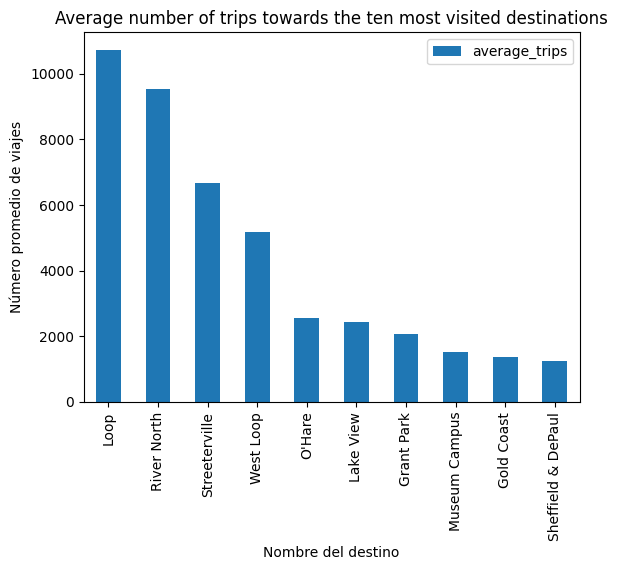

In [11]:
top_10_destinations.plot(x='dropoff_location_name', y= 'average_trips',kind='bar', title="Average number of trips towards the ten most visited destinations",xlabel='Nombre del destino', ylabel='Número promedio de viajes')
plt.show()

From this analysis it was observer that the most popular destination is Loop with mor than tenthousand trips.

<h3> Analysis of Number of Trips per Company </h3> 

Table 1 contains information on the number of trips by company. The table will be sorted in descending order by number of trips to identify the 10 companies with the highest trip counts during the period from November 15 to 16, 2017. The describe method will be used to examine the distribution of trip numbers and identify any outliers.

In [12]:
top_10_companies=table_1.sort_values(by='trips_amount', ascending=False).head(10)
print(top_10_companies)

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


In [13]:
print(table_1.describe())

       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000


It is observed that the number of trips per company varies significantly, with a large disparity between the company with the highest number of trips and the one with the fewest. 

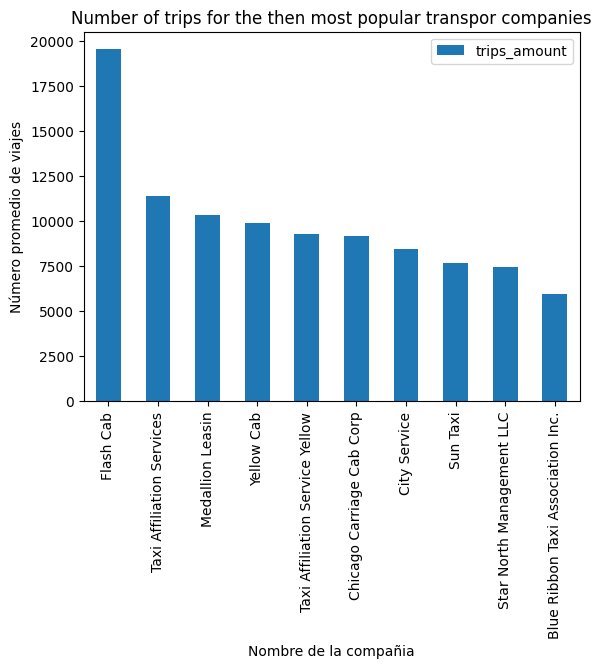

In [14]:
top_10_companies.plot(x='company_name', y= 'trips_amount',kind='bar', title="Number of trips for the then most popular transpor companies",xlabel='Nombre de la compañia', ylabel='Número promedio de viajes')
plt.show()

Notably, the most popular company recorded a substantially higher number of trips than the next nine most popular companies.

<h3> Hypotesis test </h3>

<h4> Objective: </h4> 
To estimate whether weather conditions affect the trip duration. A two-tailed test with an alpha level of 0.05 will be performed, as the goal is to assess whether there is a significant difference between the means. Trip duration data will first be divided into two groups: trips taken in good weather and those taken in rainy conditions. A t-test will then be used to evaluate whether there is a statistically significant difference between the mean trip durations of the two groups.

In [15]:
good_weather=table_3[table_3['weather_conditions']=='Good']
good_weather.head(10)
print()
rain_weather=table_3[table_3['weather_conditions']=='Bad']
rain_weather.head(10)

start_ts weather_conditions  duration_seconds  duplicated
6  2017-11-04 16:00:00                Bad            2969.0       False
30 2017-11-18 12:00:00                Bad            1980.0       False
34 2017-11-04 17:00:00                Bad            2460.0       False
51 2017-11-04 16:00:00                Bad            2760.0       False
52 2017-11-18 12:00:00                Bad            2460.0       False
54 2017-11-18 10:00:00                Bad            1440.0       False
65 2017-11-04 18:00:00                Bad            2363.0       False
70 2017-11-18 16:00:00                Bad            3000.0       False
78 2017-11-04 16:00:00                Bad            3120.0       False
92 2017-11-18 07:00:00                Bad            1511.0       False

In [16]:
results= st.ttest_ind(good_weather['duration_seconds'],rain_weather['duration_seconds'])

print('valor p: ', results.pvalue)

if results.pvalue < 0.05:
    print("Nule hypothesis rejected: It is possible to conclude that there is a significative relationship between the weather and the trip duration")
else: 
    print('Nule hypothesis can not be rejected: there is no significative relationship between the weather and the trip duration')

valor p:  6.517970327099473e-12
Nule hypothesis rejected: It is possible to conclude that there is a significative relationship between the weather and the trip duration


In [17]:
good_weather_avg=good_weather['duration_seconds'].mean()
print(good_weather_avg)
print()
rain_weather_avg=rain_weather['duration_seconds'].mean()
print(rain_weather_avg)

1999.6756756756756

2427.2055555555557


<h2>Conclusions of the Analysis</h2>

The analysis identified the 10 most popular travel destinations and the 10 companies with the highest number of recorded trips during the period from November 15 to 16, 2017.

The most popular destination was Loop, with an average of over 10,000 trips to that location.

The most popular company was Flash Cab, with more than 19,000 trips recorded.

Finally, the analysis also revealed that rain significantly affects the duration of trips between Loop and O’Hare. The average trip duration in rainy conditions was found to be nearly twice as long as in good weather.